# Class Notes on Statistical Tests

Statistical tests are used to answer very specific questions about a data set.  They only apply in certain conditions, and they only answer certain questions, but they have great *statistical strength*.  

## Basic Tests

These tests are used mostly for when we are exploring a data set.  They often let us apply later tests.  While these will be the only that we explore in this class, there are *several* other statistical tests that are frequently used in Data Science.

### 1) Test for Normality

- Many theories in Data Science assume that a data set is **Normaly Distributed**
    - i.e., it has a bell shape.  
- A *test for normality* gives us a way to verify if a particular data set really **HAS** a Normal Distribution
- There are actually several such tests:
    - Lilliefors Test
    - Anderson-Darling Test
    - Cramer-von Mises Test
    
- One of the simplest to use is a **Visual Check**
    - This works by simply plotting the data and overlaying the equivalent Normal Distribution

In [1]:
import pandas as pd
hw_data = pd.read_csv("http://nur-socr-web-dev02.miserver.it.umich.edu:3000/datasets/Baseball_Players.csv", usecols=["Name","Height(inches)","Weight(pounds)"])
hw_data.head()

,Name,Height(inches),Weight(pounds)
0,Adam_Donachie,74,180
1,Paul_Bako,74,215
2,Ramon_Hernandez,72,210
3,Kevin_Millar,72,210
4,Chris_Gomez,73,188


In [2]:
hw_data.shape

(1034, 3)

In [3]:
import matplotlib.pyplot as plt
plt.rc("figure", figsize=(10,4), dpi=100)

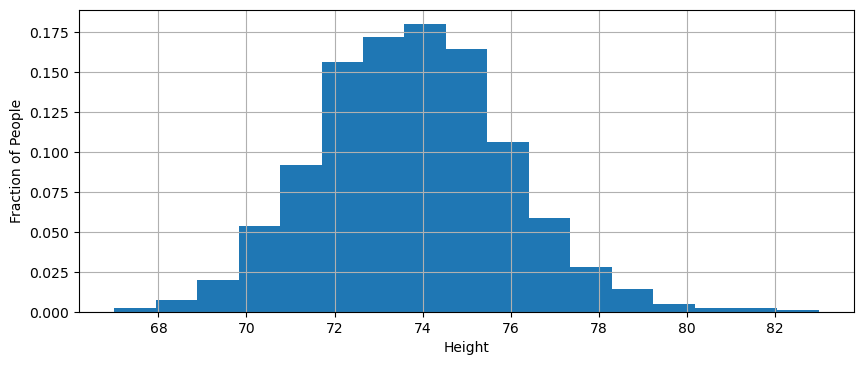

In [4]:
plt.hist(hw_data["Height(inches)"], bins=17, density=True)
plt.grid()
plt.xlabel("Height"); plt.ylabel("Fraction of People")
plt.show()

In [5]:
import numpy as np
from scipy import stats

In [6]:
d_mean = hw_data.mean()[0]
d_std = hw_data.std()[0]

In [7]:
d_mean

73.6972920696325

In [8]:
d_std

2.305818310517566

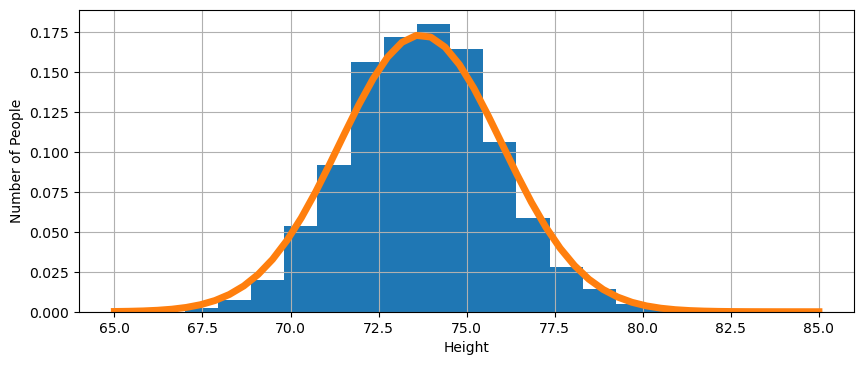

In [9]:
plt.hist(hw_data["Height(inches)"], bins=17, density=True)
xline = np.linspace(65,85)
plt.plot(xline, stats.norm.pdf(xline,d_mean,d_std),linewidth=5)
plt.grid()
plt.xlabel("Height"); plt.ylabel("Number of People")
plt.show()

In [10]:
from statsmodels.graphics.gofplots import qqplot

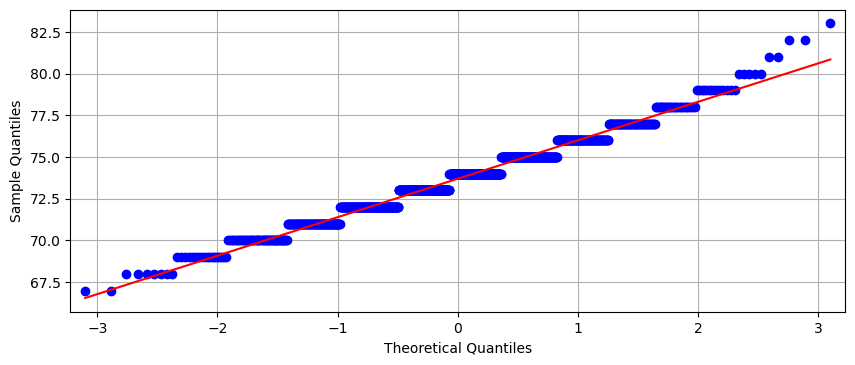

In [11]:
qqplot(hw_data["Height(inches)"], line='s')
plt.grid()
plt.show()

- A statistical test that could tell us the same thing is the Shipiro-Wilks test, 
- When this test returns a small probability, it tells us the data is likely **not** normal

In [12]:
stats.shapiro(hw_data["Height(inches)"])

ShapiroResult(statistic=0.9805691242218018, pvalue=1.590497733516827e-10)

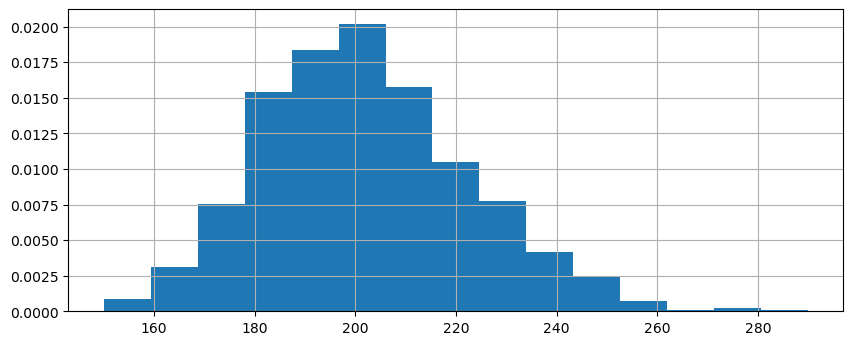

In [13]:
plt.hist(hw_data["Weight(pounds)"], bins=15, density=True)
plt.grid()
plt.show()

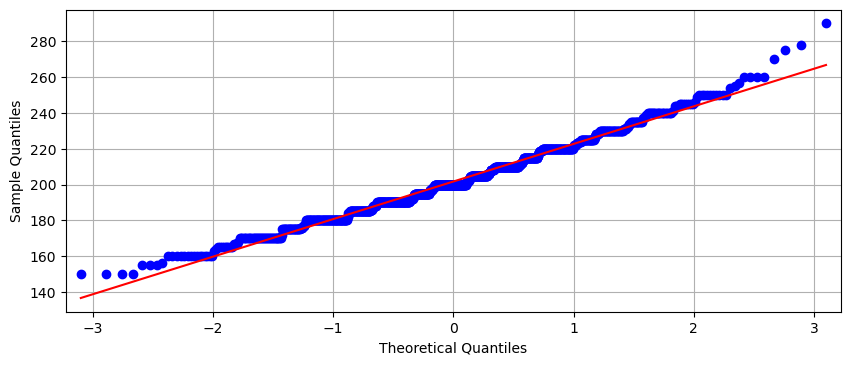

In [14]:
qqplot(hw_data["Weight(pounds)"], line='s')
plt.grid()
plt.show()

In [15]:
stats.shapiro(hw_data["Weight(pounds)"])

ShapiroResult(statistic=0.9883370995521545, pvalue=2.531893983359623e-07)

#### What About Other Distributions?

- If we wanted to test for other distributional shapes, we can always use the **Kolmogorov-Smirnov Test**, which lets us test any general distribution
    - Often abbreviated as the KS Test

In [16]:
stats.kstest(hw_data["Height(inches)"], 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

In [17]:
stats.kstest(hw_data["Height(inches)"], 'expon')

KstestResult(statistic=1.0, pvalue=0.0)

In [18]:
stats.kstest(hw_data["Height(inches)"], 'laplace')

KstestResult(statistic=1.0, pvalue=0.0)

In [19]:
stats.kstest(hw_data["Height(inches)"], 'uniform')

KstestResult(statistic=1.0, pvalue=0.0)

### 2) Test for Outliers

- Whenever we look at data, we need to be wary of outliers
    - They can really mess up predictions
    - They may need to be removed
- An outlier can be:
    - a **global** outlier if it is significantly different than all other data points
    - a **contextual** outlier if it is only an outlier in a certain context
        - These are much harder to find
- There are multiple definitions for global outliers:
    - If the data is roughly normal, then any data points more than 3 standard deviations away is an outlier
    - Using the quartiles (25\% chunks of the data) we can calculate the Inter-Quartile-Range (IQR) as the distance between the 25\% chunk and the 75\% of data
        - Any data point more than 1.5 times the IQR is an outlier
    - More generally, a global outlier is typically defined as being *significantly* further away from the 1 and 99 percentiles

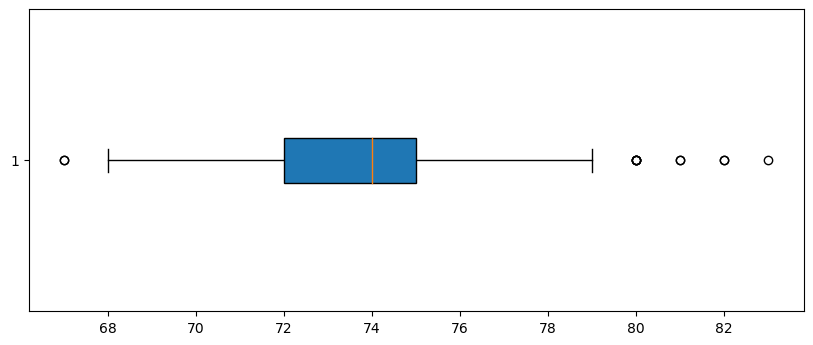

In [20]:
plt.boxplot(hw_data["Height(inches)"],vert=False, patch_artist=True)
plt.show()

In [21]:
hw_data[hw_data["Height(inches)"] < 68]

,Name,Height(inches),Weight(pounds)
1007,Aaron_Miles,67,180
1008,David_Eckstein,67,165


In [22]:
hw_data[hw_data["Height(inches)"] > 79]

,Name,Height(inches),Weight(pounds)
62,Andrew_Sisco,81,260
124,Kyle_Snyder,80,220
282,Richie_Sexson,80,237
366,Scott_Elarton,80,240
507,Phil_Stockman,80,240
573,Randy_Johnson,82,231
677,Jason_Hirsh,80,250
781,Mark_Hendrickson,81,230
881,Chris_Young,82,250
928,Jon_Rauch,83,260


- The Tietjen-Moore test can find outliers
- It typically requires the exact specification of the NUMBER of supposed outliers

In [23]:
import scikit_posthocs

In [24]:
good_vals = scikit_posthocs.outliers_tietjen(hw_data["Height(inches)"], 12)

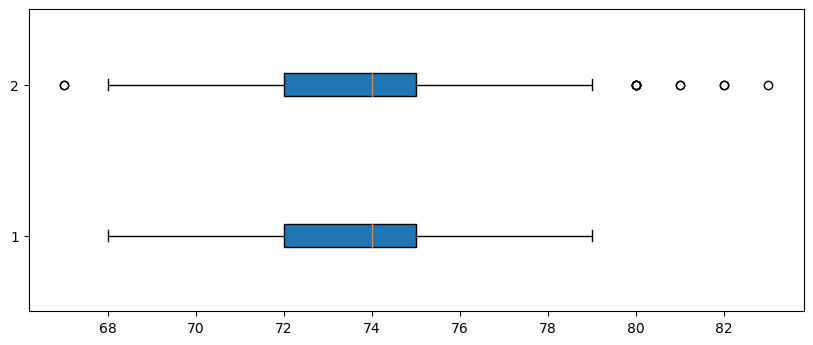

In [25]:
plt.boxplot([good_vals,hw_data["Height(inches)"]],vert=False, patch_artist=True)
plt.show()

### 3) Test for Correlation

- We have already looked at correlations in class, but we did not test is the correlation was **significant**
- This is different than having a large or small correlation
- The correlation is deemed *significant* if it is large enough given the *sample size*

In [26]:
from scipy.stats import pearsonr

In [27]:
hw_data.corr()

,Height(inches),Weight(pounds)
Height(inches),1.000000,0.530318
Weight(pounds),0.530318,1.000000


In [28]:
stat, p = pearsonr(hw_data["Height(inches)"], hw_data["Weight(pounds)"])

In [29]:
stat

0.5303180233857101

In [30]:
p

4.651095587850044e-76

- This super small value indicates that the two data sets are **very significantly** correlated.

### 4) Test for Homogenity

- Sometimes we want to test if two sets of data have the same *frequency* of labels showing up
- For example, we could label all the baseball players above 200lbs as "Big" and all players below 200lbs as "Small"
- We could then check to see if the label "Big" occurs with the same frequency for tall people (above 74") as it does for shorter people

In [31]:
df = hw_data

In [32]:
df['Size'] = pd.Categorical(["Big"]*1034, categories=["Big", "Small"])

In [33]:
df.loc[df["Weight(pounds)"] > 200, 'Size'] = "Big"

In [34]:
df.loc[df["Weight(pounds)"] <= 200, 'Size'] = "Small"

In [35]:
df[df["Height(inches)"] > 74].Size.value_counts()/df[df["Height(inches)"] > 74].count()[0]

Big      0.698113
Small    0.301887
Name: Size, dtype: float64

In [36]:
df[df["Height(inches)"] > 74].count()[0]

371

In [37]:
df[df["Height(inches)"] <= 74].Size.value_counts()/df[df["Height(inches)"] <= 74].count()[0]

Small    0.675716
Big      0.324284
Name: Size, dtype: float64

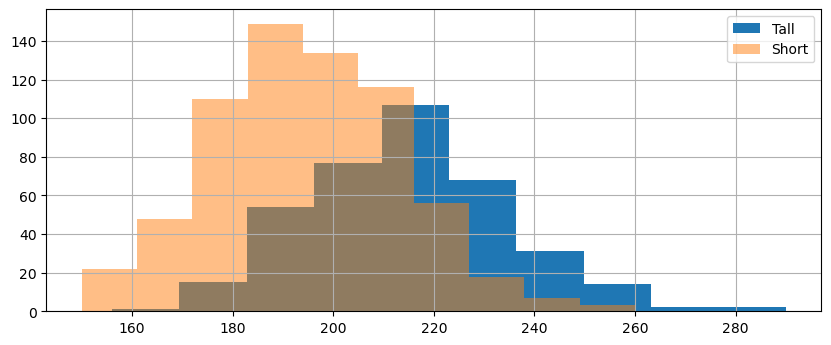

In [38]:
plt.hist(df.loc[df["Height(inches)"] > 74, "Weight(pounds)"], bins=10)
plt.hist(df.loc[df["Height(inches)"] <= 74, "Weight(pounds)"], bins=10, alpha=0.5)
plt.legend(["Tall", "Short"])
plt.grid()
plt.show()

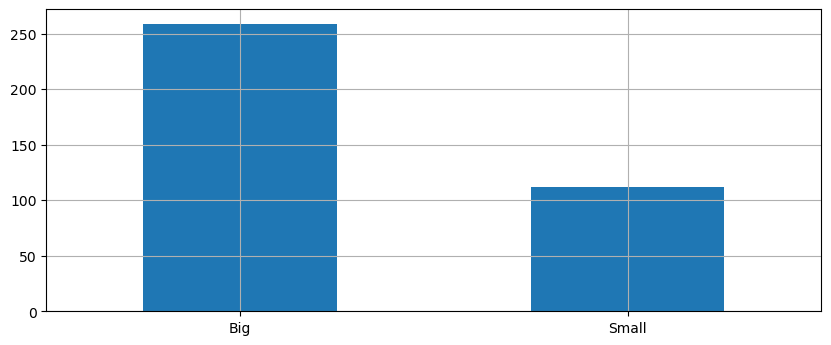

In [39]:
df.loc[df["Height(inches)"] > 74, "Size"].value_counts().plot(kind='bar', rot=0)
plt.grid()
plt.show()

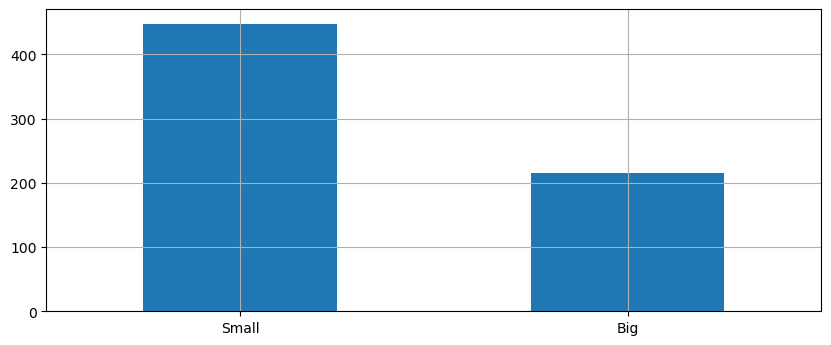

In [40]:
df.loc[df["Height(inches)"] <= 74, "Size"].value_counts().plot(kind='bar', rot=0)
plt.grid()
plt.show()

- We can use a ChiSquare test to determine if they are in fact different

In [41]:
from scipy.stats import chisquare

In [42]:
chisquare([0.698113,0.301887], [0.675716,0.324284])

Power_divergenceResult(statistic=0.002289232885926781, pvalue=0.9618390326987528)